# Unit 3 - Lesson 3 - TLADS Drill

## Thinking Like a Data Scientist

The ability to clearly communicate results like this is a _key skill_ of the data scientist. Your data and models are worthless unless people understand them well enough to act. 

Imagine you ran a binary logistic regression predicting likelihood of developing a hearing problem, using age in years and male (0=female, 1=male) as predictors. Your final model looks like this: 

$$logit(HasHearingProblem) = -1 + .02 * age + 1 * male$$

Write out a description of the effects that age and gender have on the odds of developing hearing problems in terms a layperson could understand.  Include estimates for the odds of hearing problems in a 95 year old woman and a 50 year old man. Discuss your interpretation with your mentor.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

The logit function is:

$$ L = \ln(\frac{p}{1-p})$$

Its inverse, is the probability:

$$ p = \frac{1}{1+e^{-L}}$$

We'll calculate both the logits and probabilities of hearing loss following the discussed model. 

- **A probability of 0.5 corresponds to a logit of 0.**
- **Negative logit values indicate probabilities smaller than 0.5, positive logits indicate probabilities greater than 0.5. **

In [2]:
def logit_hearing_problem(age, gender=None): # gender=1 for males, gender=0 for females
    return -1 + (0.02 * age) + (1 * gender)

In [3]:
def probability_hearing_problem(logit):
    return 1 / (1 + np.exp(-logit))

In [4]:
logit_males = [logit_hearing_problem(age, 1) for age in range(101)]
logit_females = [logit_hearing_problem(age, 0) for age in range(101)]
p_males = [probability_hearing_problem(logit_val) for logit_val in logit_males]
p_females = [probability_hearing_problem(logit_val) for logit_val in logit_females]
odds_males = np.array(p_males) / (1 - np.array(p_males))
odds_females = np.array(p_females) / (1 - np.array(p_females))

odds_ratio_males = np.array(odds_males) / np.array(odds_females)

In [5]:
df = pd.DataFrame({'age': [age for age in range(101)],
                   'p_males': p_males,
                   'logit_males': logit_males,
                   'p_females': p_females,
                   'logit_females': logit_females,
                   'odds_males': odds_males,
                   'odds_females': odds_females,
                   'odds_ratio_males': odds_ratio_males})

In [6]:
df[45:55]

,age,p_males,logit_males,p_females,logit_females,odds_males,odds_females,odds_ratio_males
45,45,0.710950,0.90,0.475021,-0.10,2.459603,0.904837,2.718282
46,46,0.715042,0.92,0.480011,-0.08,2.509290,0.923116,2.718282
47,47,0.719100,0.94,0.485004,-0.06,2.559981,0.941765,2.718282
48,48,0.723122,0.96,0.490001,-0.04,2.611696,0.960789,2.718282
49,49,0.727108,0.98,0.495000,-0.02,2.664456,0.980199,2.718282
50,50,0.731059,1.00,0.500000,0.00,2.718282,1.000000,2.718282
51,51,0.734973,1.02,0.505000,0.02,2.773195,1.020201,2.718282
52,52,0.738850,1.04,0.509999,0.04,2.829217,1.040811,2.718282
53,53,0.742691,1.06,0.514996,0.06,2.886371,1.061837,2.718282
54,54,0.746494,1.08,0.519989,0.08,2.944680,1.083287,2.718282


In [7]:
df[-10:]

,age,p_males,logit_males,p_females,logit_females,odds_males,odds_females,odds_ratio_males
91,91,0.860566,1.82,0.694236,0.82,6.171858,2.270500,2.718282
92,92,0.862949,1.84,0.698465,0.84,6.296538,2.316367,2.718282
93,93,0.865297,1.86,0.702661,0.86,6.423737,2.363161,2.718282
94,94,0.867611,1.88,0.706822,0.88,6.553505,2.410900,2.718282
95,95,0.869892,1.90,0.710950,0.90,6.685894,2.459603,2.718282
96,96,0.872138,1.92,0.715042,0.92,6.820958,2.509290,2.718282
97,97,0.874352,1.94,0.719100,0.94,6.958751,2.559981,2.718282
98,98,0.876533,1.96,0.723122,0.96,7.099327,2.611696,2.718282
99,99,0.878681,1.98,0.727108,0.98,7.242743,2.664456,2.718282
100,100,0.880797,2.00,0.731059,1.00,7.389056,2.718282,2.718282


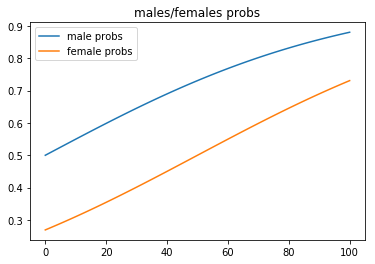

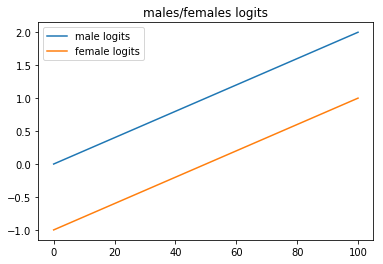

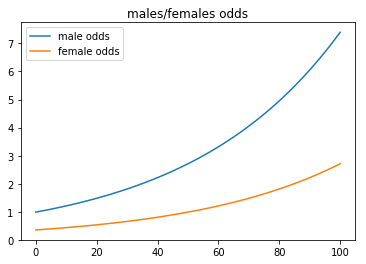

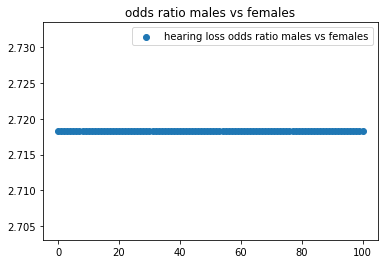

In [8]:
plt.figure()
plt.title('males/females probs')
plt.plot(df['p_males'])
plt.plot(df['p_females'])
plt.legend(['male probs', 'female probs'])

plt.figure()
plt.title('males/females logits')
plt.plot(df['logit_males'])
plt.plot(df['logit_females'])
plt.legend(['male logits', 'female logits'])

plt.figure()
plt.title('males/females odds')
plt.plot(df['odds_males'])
plt.plot(df['odds_females'])
plt.legend(['male odds', 'female odds'])

plt.figure()
plt.title('odds ratio males vs females')
plt.scatter(range(101), df['odds_ratio_males'])
plt.legend(['hearing loss odds ratio males vs females'])
plt.show()

###### Summary

Based on the model:

- A 50 year old man has a ~73% chance of having hearing problems, meaning his odds are ~2.72 times greater than not.  This is slightly greater than a 95 year old woman who has a ~71% chance of having hearing problems, meaning her odds are ~2.46 times greater than not.

- A 50 year old woman has a 50% chance of having hearing problems, meaning she is equally likely to have them as opposed to not have them (odds equal to 1).

- A 95 year old man has an ~87% chance of having hearing problems, meaning his odds are ~6.69 times greater than not.

This means that _for any given age_, males are approximately 2.72 times as likely to develop hearing problems relative to females.

- (age=50, m/f odds = 2.72/1)
- (age=95, m/f odds = 6.69/2.46)